# Import Libraries

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
mpl.rcParams['figure.dpi'] = 500

# Import data

In [2]:
data = pd.read_csv('CarPrice_Assignment.txt')

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


# Plot Data

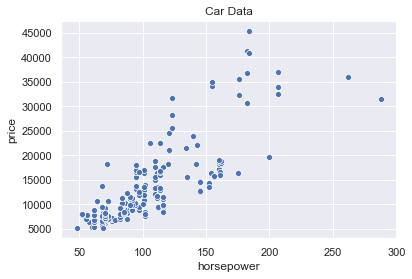

In [4]:
sns.set()
plt.title('Car Data')
sns.scatterplot(x='horsepower', y='price', data=data)

# Define equations for optimization

In [5]:
def linear(x, w, b):
    return w*x + b

def gradient_descent_linear(f, w, b, x, y, lr):
    h = f(x, w, b)
    w -= lr*((h - y)*x).mean()
    b -= lr*(h - y).mean()
    loss = ((h-y)**2).mean()
    return w, b, loss

# Define parameters

In [6]:
iterations = 500
w = 1
b = 0
lr = 1e-5

# Perform optimization

In [7]:
loss_log = []
data_x = data['horsepower']
data_y = data['price']
for _ in range(iterations):
    w, b, loss = gradient_descent_linear(linear, w, b, data_x, data_y, lr)
    loss_log.append(loss)

# Plot Results

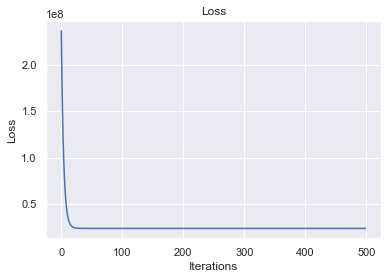

In [8]:
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
sns.lineplot(range(len(loss_log)), loss_log)

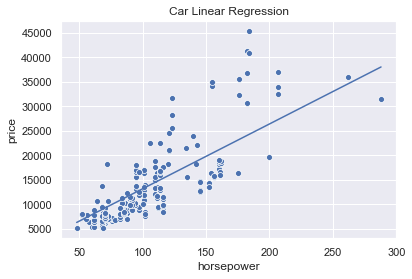

In [9]:
plt.title('Car Linear Regression')
x_line = np.linspace(data['horsepower'].min(), data['horsepower'].max(), 1000)
sns.scatterplot(x='horsepower', y='price', data=data)
sns.lineplot(x=x_line, y=w*x_line+b, data=data)